## Importing Libraries

We begin by importing the libraries Needed

 **`pandas`** for reading data from various file formats

 **`seaborn`** visualization library built on Matplotlib
 
 **`matplotlib.pyplot`** plotting module from the Matplotlib library


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Loading Dataset

We load the **Banknote Authentication** dataset from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/banknote+authentication 
The dataset contains features extracted from images of banknotes, which are used to determine whether a banknote is authentic or fake.

   `Variance`: Variance of the wavelet-transformed image.

   `Skewness`: Skewness of the wavelet-transformed image.

   `Kurtosis`: Kurtosis of the wavelet-transformed image.

   `Entropy`: Entropy of the image.
   
   `Class`: The target variable (0 = fake, 1 = authentic).

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
columns = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class']
df = pd.read_csv(url, header=None, names=columns)


## Visualizing The Features

We use a **pair plot** to visualize to understand how well the classes (authentic vs. fake banknotes) are separated based on different feature combinations.

 **`sns.pairplot()`**: Plots pairwise relationships in the dataset.
Each cell shows a scatterplot for a pair of features.

Diagonal plots show feature distributions.

The `hue='Class'` parameter colors the points based on the target class (0 or 1).

**`plt.suptitle()`**: Adds a title to the entire figure.
 
 **`plt.show()`**: Renders the plot.

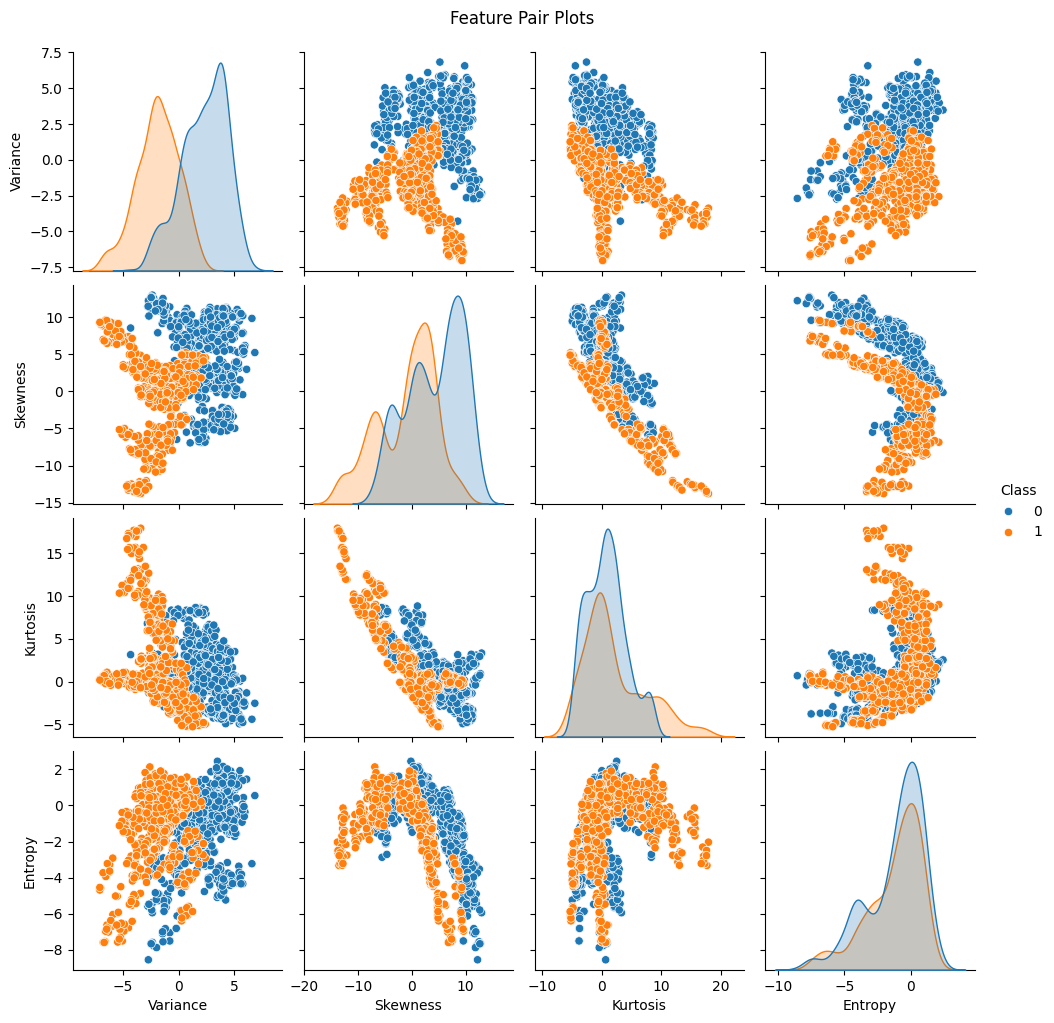

In [3]:
sns.pairplot(df, hue='Class')
plt.suptitle("Feature Pair Plots", y=1.02)
plt.show()

## **Q:  "Do you think a decision tree is a good algorithm for these features?"**

## From plots we can see that some features do separate the classes quite well, so a decision tree can be a reasonable choice.

## Training and Evaluating a Decision Tree Classifier

We build a **Decision Tree classifier** to predict whether a banknote is autentic or fake based on its statistical features.

 `X`: The input features (`Variance`, `Skewness`, `Kurtosis`, `Entropy`)

 `y`: The target label (`Class`)

 The data is split into **80% training** and **20% testing** subsets using `train_test_split`.

 `criterion='gini' or 'entrophy'` uses Gini or Etnrophy

 `max_depth=2, 4, 6, etc.` limits the tree depth to prevent overfitting

 `min_samples_split=3, 5, 7, etc.`: A node must have at least 5 samples to be split

 `Classification Report` shows precision, recall, F1-score, support for each class

 `Confusion Matrix` visualizes confusion matrix with `ConfusionMatrixDisplay`

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       148
           1       1.00      0.94      0.97       127

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



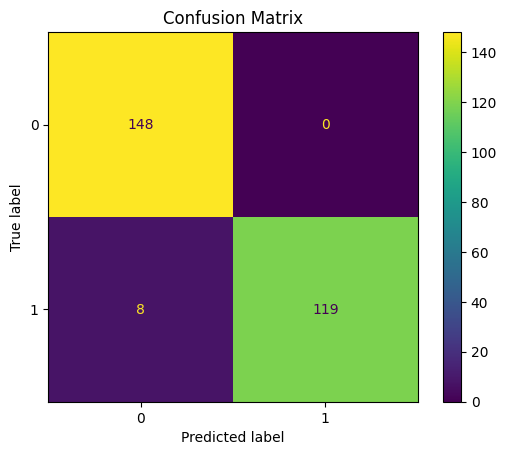

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

#split features and labels
X = df.drop("Class", axis=1)
y = df["Class"]

# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train decision tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=4, random_state=42)
clf.fit(X_train, y_train)

#predict and evaluate
y_pred = clf.predict(X_test)

#classification report
print(classification_report(y_test, y_pred))

#confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

## I have tried different values for **max_depth** and **min_samples_split**. And also tried *gini* and *entropy* for **criterion**
## Values above looked good to continue

## Visualizing the Decision Tree

We visualize the structure of the trained tree
`plot_tree()` from `sklearn.tree` is used to generate the plot


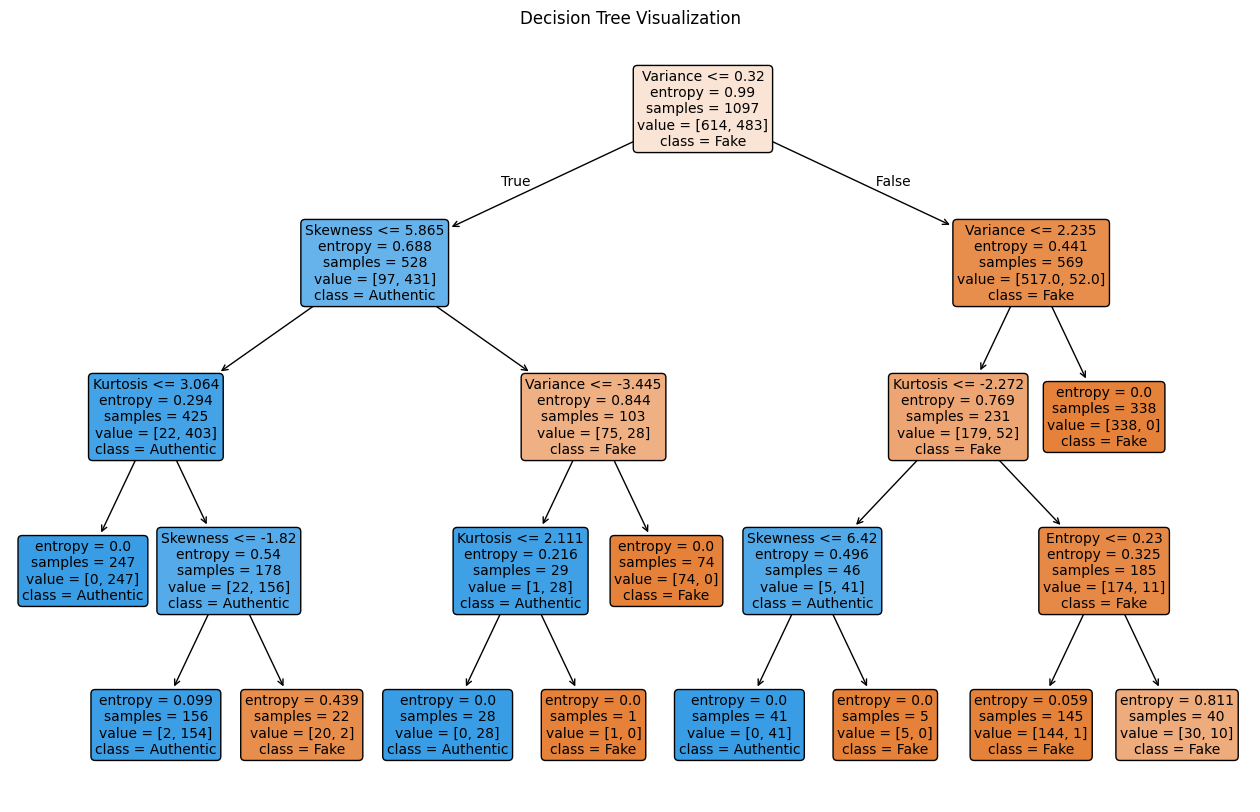

In [5]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 10))
plot_tree(clf,
          feature_names=X.columns,
          class_names=["Fake", "Authentic"],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

## As seen in the tree visualization, limiting the max depth improves interpretability. Deeper trees become harder to follow and might overfit to training data

## Feature Importance Analysis

To see which features contributed the most to the model's decisions, we analyze the feature importances derived from the trained Decision Tree
  `clf.feature_importances_` returns an array of importance scores corresponding to each feature.

   Features are plotted on the Y-axis.
   
   Their corresponding importance scores are plotted on the X-axis.

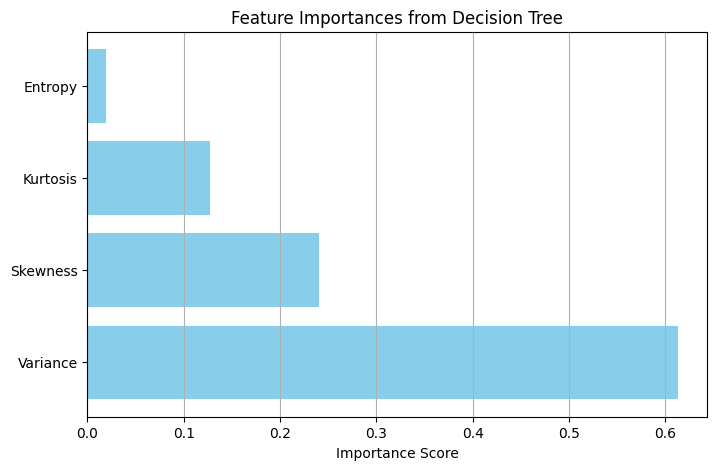

In [6]:
import numpy as np

# feature importances
importances = clf.feature_importances_

#bar plot
plt.figure(figsize=(8, 5))
plt.barh(X.columns, importances, color='skyblue')
plt.xlabel("Importance Score")
plt.title("Feature Importances from Decision Tree")
plt.grid(True, axis='x')
plt.show()


## In this project, I explored decision trees using the Banknote Authentication dataset. After analyzing the image-based features (variance, skewness, kurtosis, and entropy), I observed that certain features clearly separated the classes, which suggests that a decision tree could be an effective model.

## Training with different max_depth, min_samples_split, and criterion values helped balance performance and interpretability. I found that a tree with limited depth ( = 4 ) achieved good accuracy while remaining easy to interpret.

## From the feature importance plot, Variance and Skewness were the most influential in classifying the banknotes, while Kurtosis and Entropy played smaller roles.

## Overall, decision trees are well-suited for this dataset because they are interpretable, require little preprocessing, and perform well even with limited tuning.